In [81]:
#Import everything
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import numpy as np
figsize(12.5, 4)
import pymc as pm

In [67]:
parameter = pm.Exponential("poisson_param", 1)
data_generator = pm.Poisson("data_generator", parameter)
data_plus_one = data_generator + 1

In [68]:
print("Children of `parameter`: ")
print(parameter.children)

Children of `parameter`: 
set([<pymc.distributions.Poisson 'data_generator' at 0x120747310>])


In [69]:
print("\nParents of `parameter`: ")
print(parameter.parents)


Parents of `parameter`: 
{'beta': 1}


In [70]:
print("parameter.value =", parameter.value)
parameter.random()
print("parameter.value =", parameter.value)

('parameter.value =', array(0.6595857392216329))
('parameter.value =', array(0.9265815513773713))


In [83]:
samples = [parameter.random() for i in range(50000)]

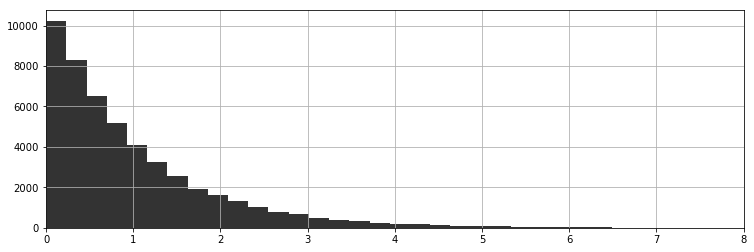

In [103]:
plt.hist(samples, bins=50, color="k", alpha = .8, histtype="stepfilled")
plt.xlim(0, 8);
plt.grid(True);

In [99]:
uni = pm.DiscreteUniform("uni",1,10)

In [100]:
uni_vars = [uni.random() for i in range(50000)]

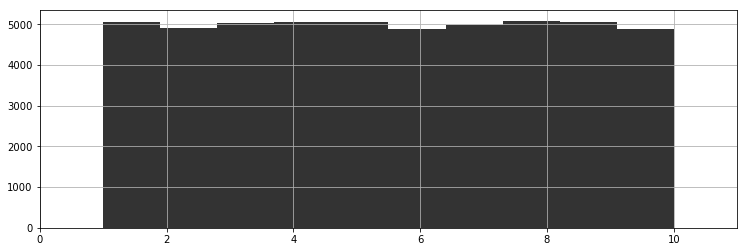

In [102]:
plt.hist(uni_vars, bins=10, color="k", alpha = .8, histtype="stepfilled")
plt.xlim(0, 11);
plt.grid(True);